In [12]:
import librosa
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
#import tensorflow as tf
import IPython.display as ipd
import librosa.display
import scipy
import glob
import numpy as np
import math
import warnings
import pickle
from sklearn.utils import shuffle
import zipfile

In [13]:
mozilla_basepath = "./dataset/test"
fs = 16e3
windowLength = 256
fftLength = windowLength
overlap = round(0.25 * windowLength) # overlap of 75%
window = scipy.signal.hamming(windowLength, sym=False)

In [14]:
def read_audio_unnormalize(filepath, sample_rate, normalize=True):
    """Read an audio file and return it as a numpy array"""
    audio, sr = librosa.load(filepath, sr=sample_rate)
    #if normalize:
    #  div_fac = 1 / np.max(np.abs(audio)) / 3.0
    #  audio = audio * div_fac
    return audio, sr
def read_audio_normalize(filepath, sample_rate, normalize=True):
    """Read an audio file and return it as a numpy array"""
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize:
      div_fac = 1 / np.max(np.abs(audio)) / 3.0
      audio = audio * div_fac
    return audio, sr

C:\Users\Matija\Anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Min: -0.3777199 Max: 0.29293624


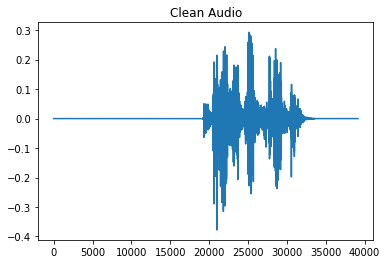

In [15]:
cleanAudio, sr = read_audio_unnormalize(os.path.join(mozilla_basepath, 'abc.mp3'), sample_rate=fs)

f, (ax1) = plt.subplots(1, 1, sharey=True)

ax1.plot(cleanAudio)
ax1.set_title("Clean Audio")

print("Min:", np.min(cleanAudio),"Max:",np.max(cleanAudio))
ipd.Audio(data=cleanAudio, rate=sr) # load a local WAV file

#librosa.stft(cleanAudio, n_fft=fftLength, win_length=windowLength, hop_length=overlap, window=window, center=True)


C:\Users\Matija\Anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Min: -0.33333334 Max: 0.25851277
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(129, 613)


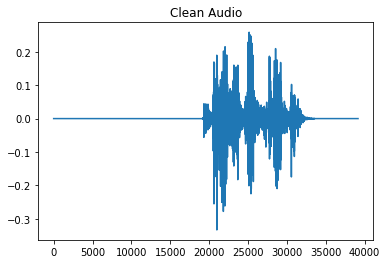

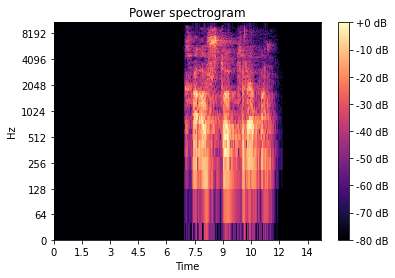

In [16]:
cleanAudio, sr = read_audio_normalize(os.path.join(mozilla_basepath, 'abc.mp3'), sample_rate=fs)

f, (ax1) = plt.subplots(1, 1, sharey=True)

ax1.plot(cleanAudio)
ax1.set_title("Clean Audio")

print("Min:", np.min(cleanAudio),"Max:",np.max(cleanAudio))

stft_features = librosa.stft(cleanAudio, n_fft=fftLength, win_length=windowLength, hop_length=overlap, window=window, center=True)

stft_features = np.abs(stft_features)

print(stft_features)

print(stft_features.shape)

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(stft_features,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")




In [ ]:

print("Min:", np.min(stft_features),"Max:",np.max(stft_features))


denoisedAudioFullyConvolutional = librosa.istft(stft_features, win_length=windowLength, hop_length=overlap, window=window, center=True)

#denoisedAudioFullyConvolutional = revert_features_to_audio(STFTFullyConvolutional, noisyPhase, mean, std)
print("Min:", np.min(denoisedAudioFullyConvolutional),"Max:",np.max(denoisedAudioFullyConvolutional))
ipd.Audio(data=cleanAudio, rate=sr) # load a local WAV file

ipd.Audio(data=denoisedAudioFullyConvolutional, rate=fs) # load a local WAV file